In [17]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from src import correlation, normalize_subtraction, three_channel_correlation, show_output, normalize_pixel, normalize_reverse

ImportError: cannot import name 'normalize_reverse' from 'src' (/Users/andrewwonwhoonah/human_interface_media_2022_fall/src/__init__.py)

In [4]:
image_original1 = cv2.imread('data/image01.jpg')
image1 = image_original1[:,:,::-1] # BGR -> RGB
patch1_1 = cv2.imread('data/patch1.png')
patch1_1 = patch1_1[:,:,::-1] # BGR -> RGB

In [ ]:
normalized_image1_s = normalize_subtraction(image1)
normalized_patch1_1_s = normalize_subtraction(patch1_1)

In [3]:
output1_1_s = three_channel_correlation(normalized_image1_s, normalized_patch1_1_s)

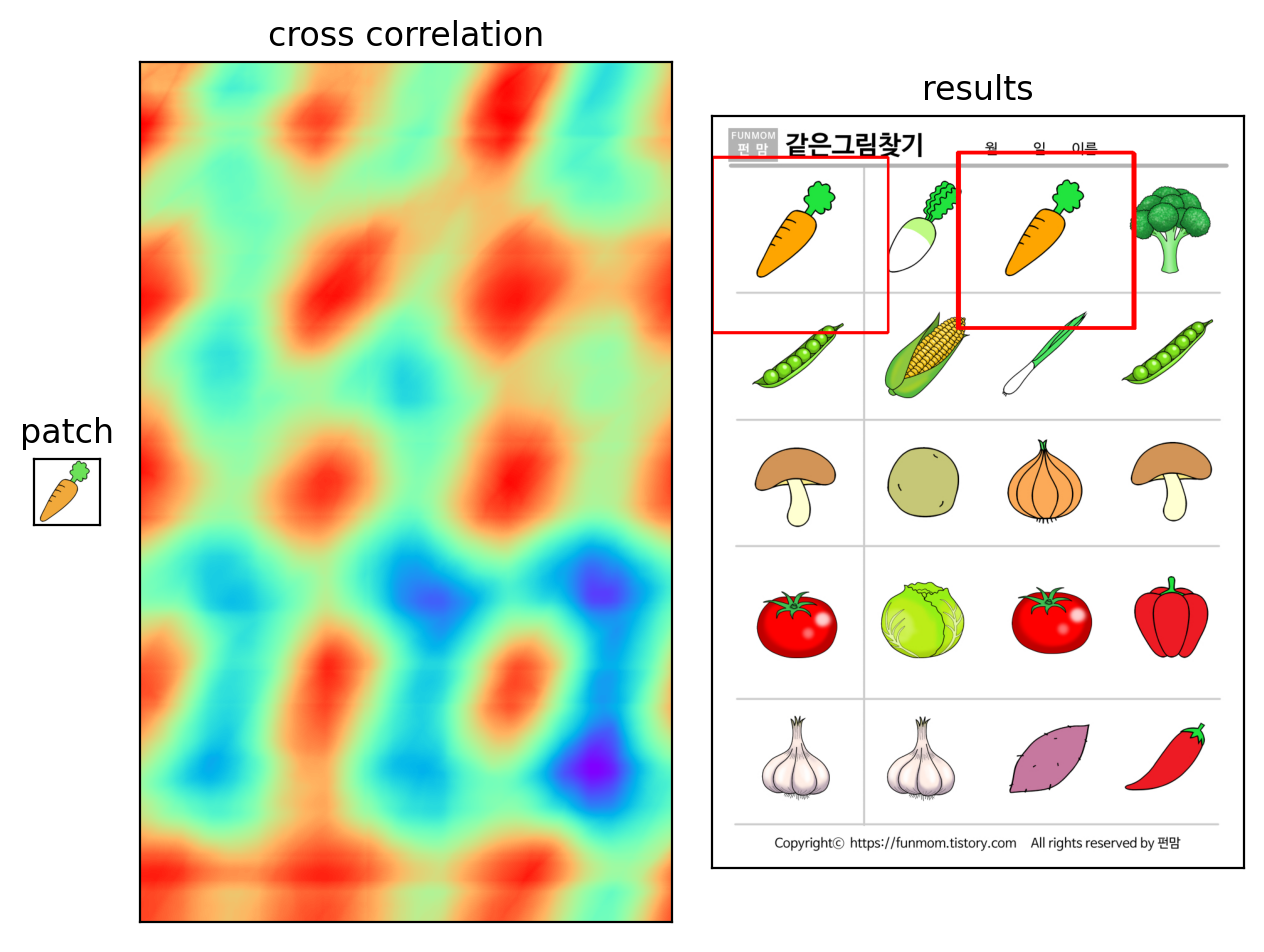

In [4]:
show_output(patch1_1, image_original1, output1_1_s, 0.999)

In [16]:
normalized_image1_r = normalize_reverse(image1)
normalized_patch1_1_r = normalize_reverse(patch1_1)
output1_1_r = three_channel_correlation(normalized_image1_r, normalized_patch1_1_r)
show_output(patch1_1, image_original1, output1_1_r, 0.999)

NameError: name 'normalize_reverse' is not defined

In [5]:
normalized_image1_p = normalize_pixel(image1)
normalized_patch1_1_p = normalize_pixel(patch1_1)

In [6]:
output1_1_p = three_channel_correlation(normalized_image1_p, normalized_patch1_1_p)

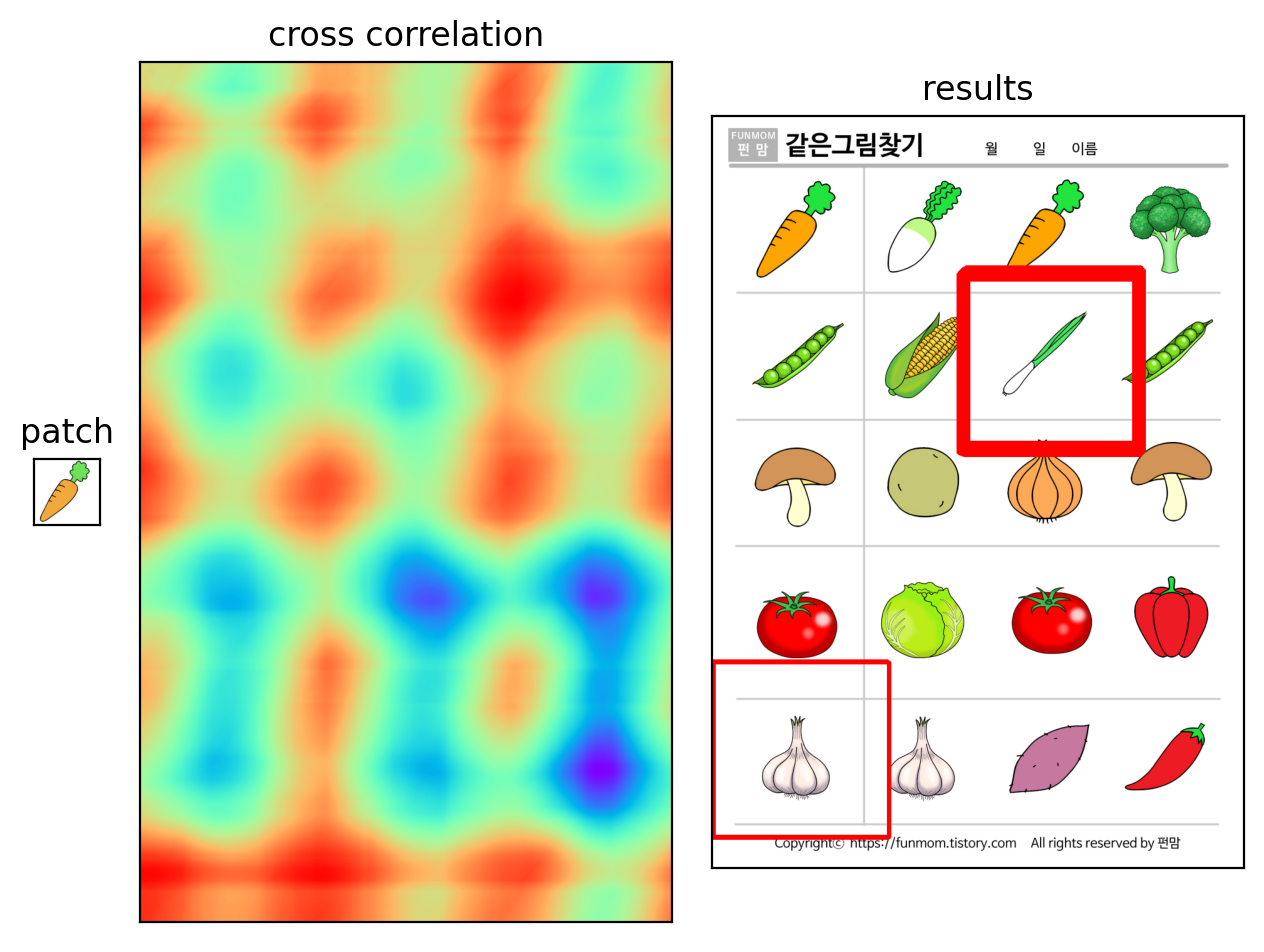

In [7]:
show_output(patch1_1, image_original1, output1_1_p, 0.999)

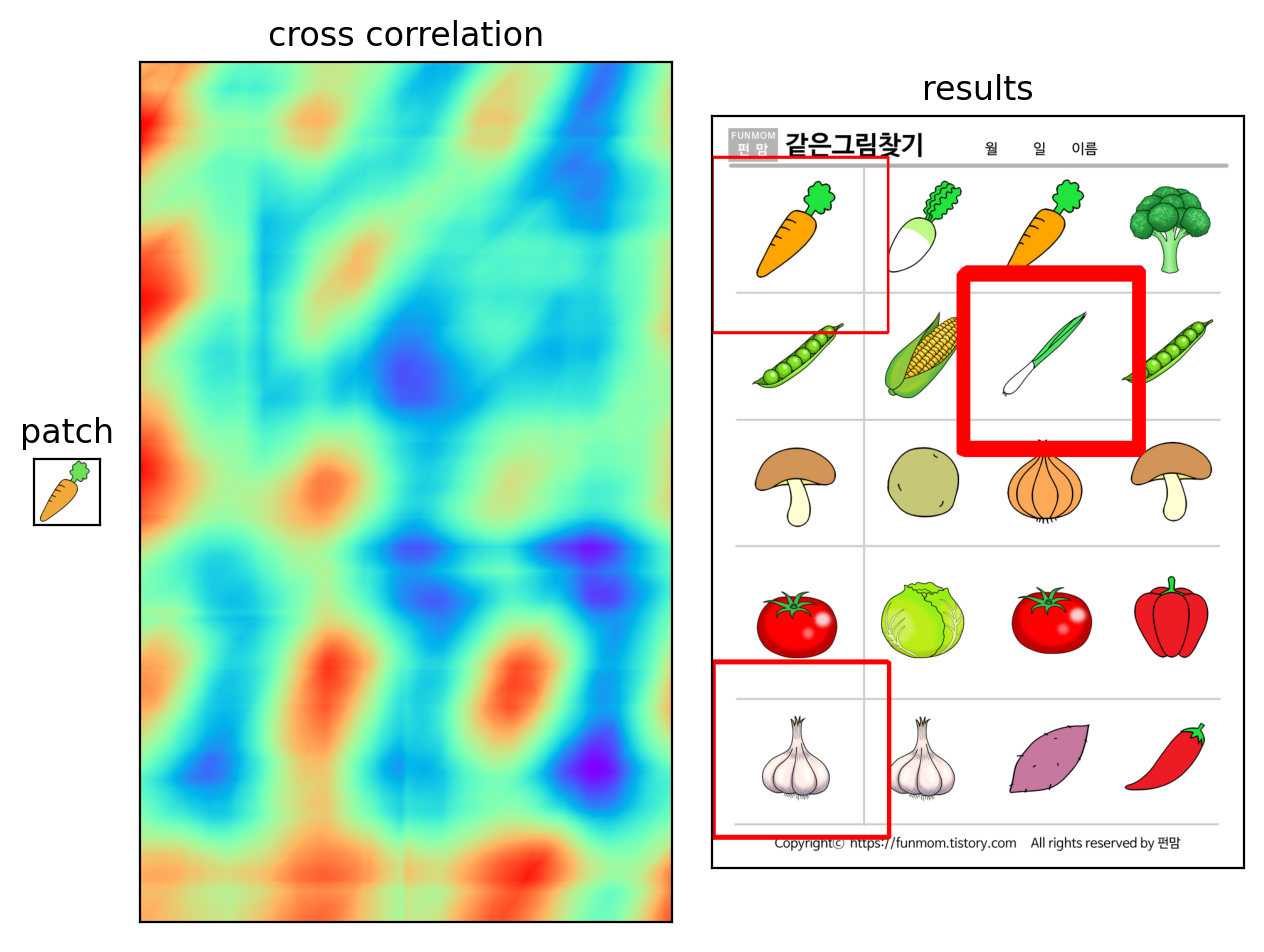

In [8]:
normalized_image1_s_p = normalize_pixel(normalize_subtraction(image1))
normalized_patch1_1_s_p = normalize_pixel(normalize_subtraction(patch1_1))
output1_1_s_p = three_channel_correlation(normalized_image1_s_p, normalized_patch1_1_s_p)
show_output(patch1_1, image_original1, output1_1_s_p, 0.999)

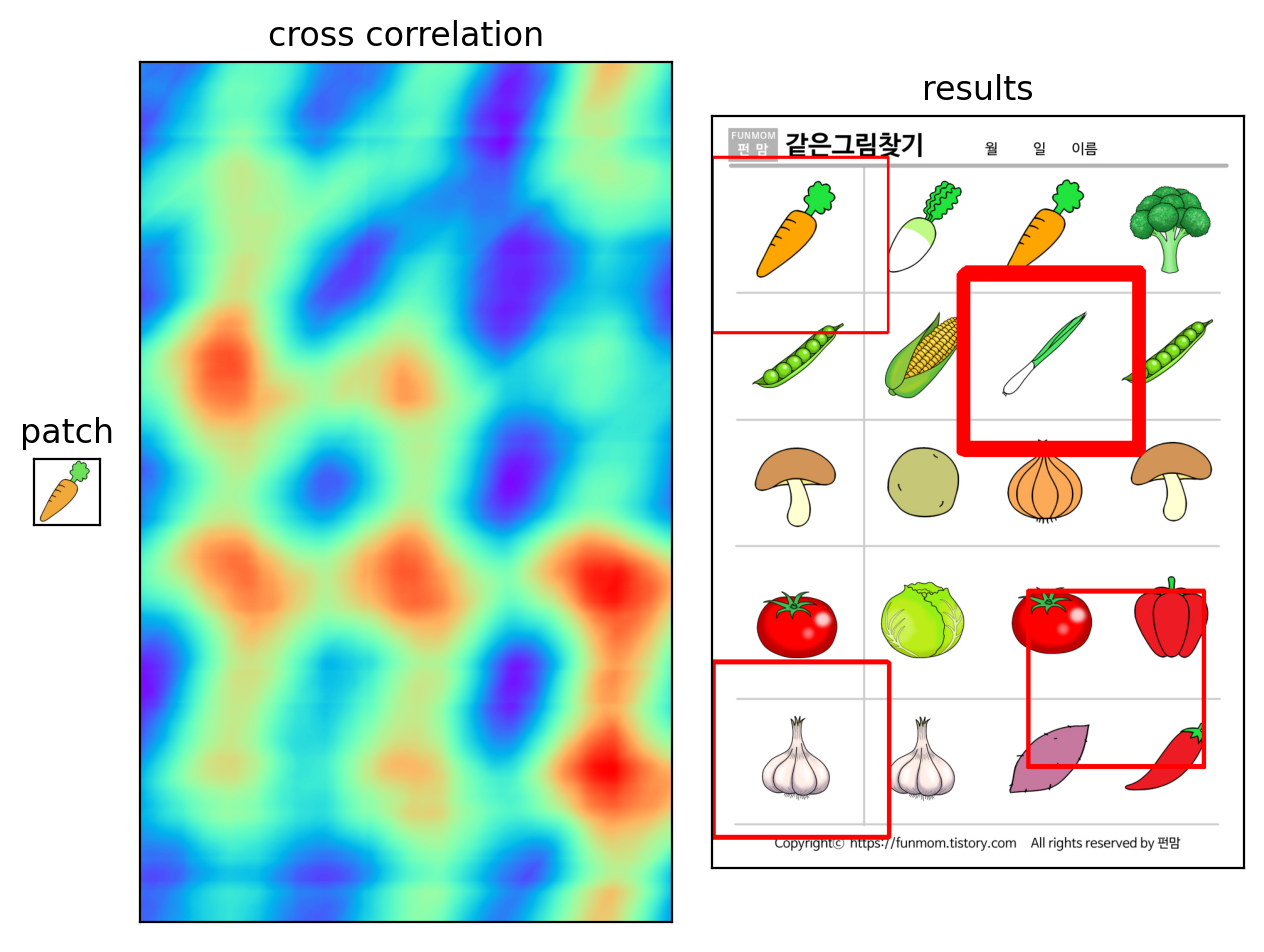

In [10]:
output1_1 = three_channel_correlation(image1, patch1_1)
show_output(patch1_1, image_original1, output1_1, 0.999)

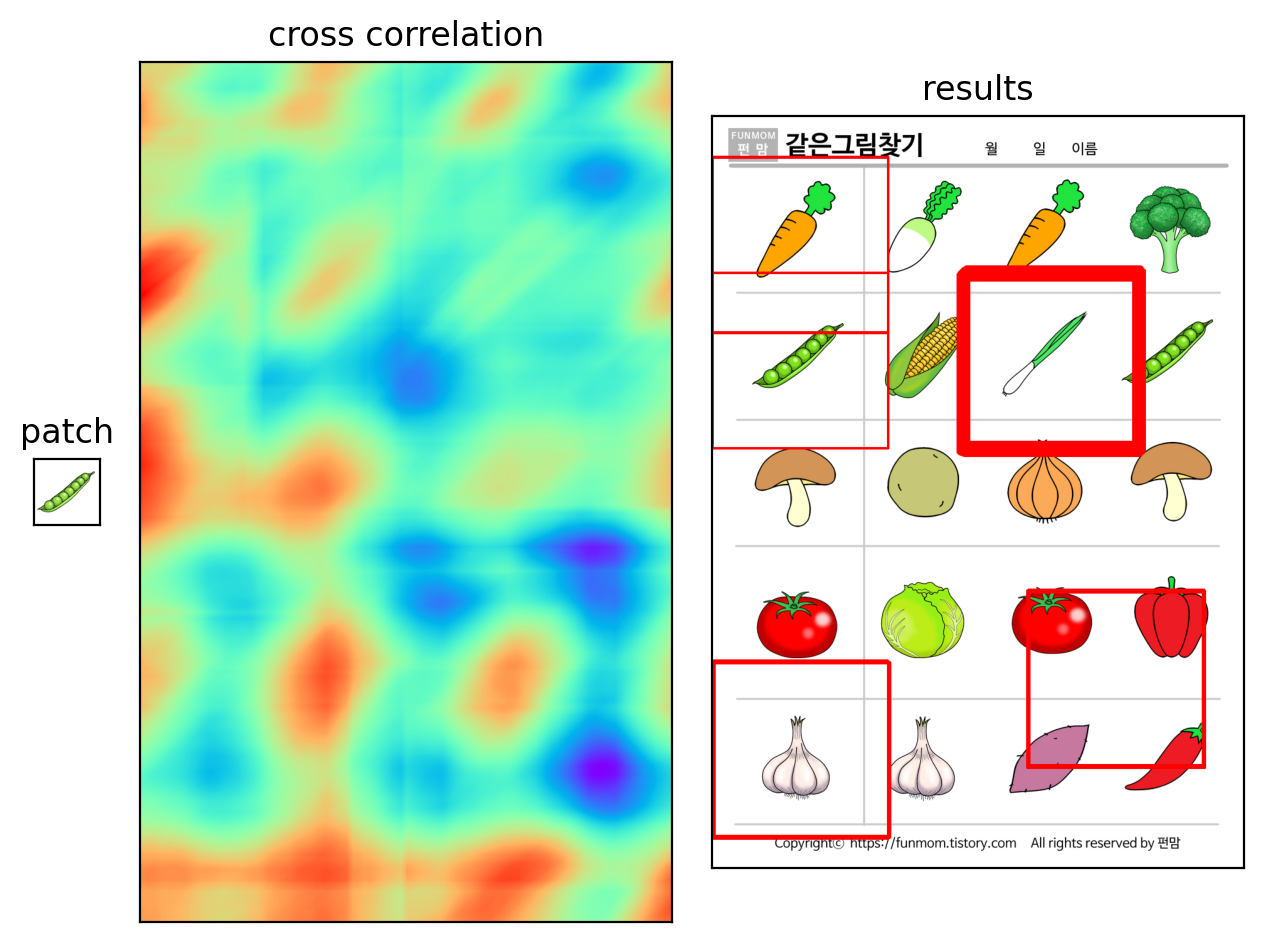

In [11]:
#image_original1 = cv2.imread('data/image01.jpg')
#image1 = image_original1[:,:,::-1] # BGR -> RGB
patch1_2 = cv2.imread('data/patch2.png')
patch1_2 = patch1_2[:,:,::-1] # BGR -> RGB
normalized_image1_s = normalize_subtraction(image1)
normalized_patch1_2_s = normalize_subtraction(patch1_2)
output1_2_s = three_channel_correlation(normalized_image1_s, normalized_patch1_2_s)
show_output(patch1_2, image_original1, output1_2_s, 0.999)